In [1]:
from PIL import Image                         # For reading image                 
from IPython.display import display           # For displaying jpg file in jupyter notebook
from IPython.display import Image as Img      # NOTE: It will cause name clash if i don't import it as Img

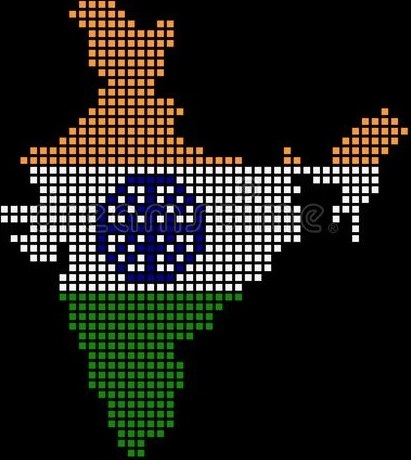

In [117]:
im = Image.open("india-colored.jpg")
px = im.load()
im

In [118]:
for i in range(im.size[0]): # for every pixel:
    white = orange = green = 0
    for j in range(im.size[1]):
        r, g, b = px[i,j]
        if r > 200 and g > 200 and b > 200:
            white += 1
        elif r > 200 and g > 100 and b < 100:
            orange += 1
        elif r < 100 and g > 200 and b < 100:
            green += 1
    
    if max([white, orange, green]) < 1:
        for j in range(im.size[1]):
            px[i,j] = (255, 0, 0)

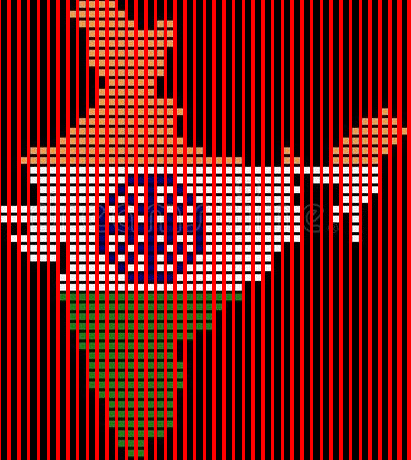

In [119]:
im.save("filter-vertical.png")
im

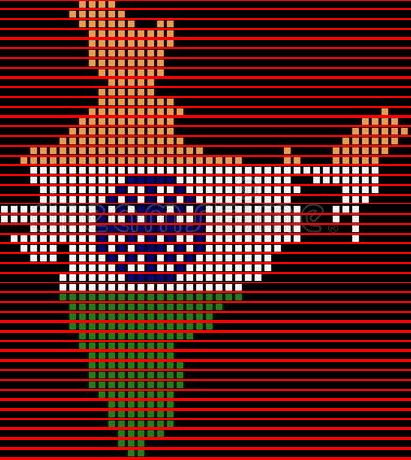

In [120]:
im2 = Image.open("india-colored.jpg")
px2 = im2.load()

for j in range(im2.size[1]): # for every pixel:
    white = orange = green = 0
    for i in range(im2.size[0]):
        r, g, b = px2[i,j]
        if r > 200 and g > 200 and b > 200:
            white += 1
        if r > 200 and g > 100 and b < 100:
            orange += 1
        if r > 10 and g > 24 and b > 10:
            green += 1
    buffer = 0
    if abs(j - im2.size[1] / 2) * 100 / im2.size[1] <= 10:
        buffer = 80
    if max([white, orange, green]) < 10 + buffer:
        for i in range(im2.size[0]):
            px2[i,j] = (255, 0, 0)
            px[i,j] = (255, 0, 0)
im2

In [121]:
im2.save("filter-horizontal.png")

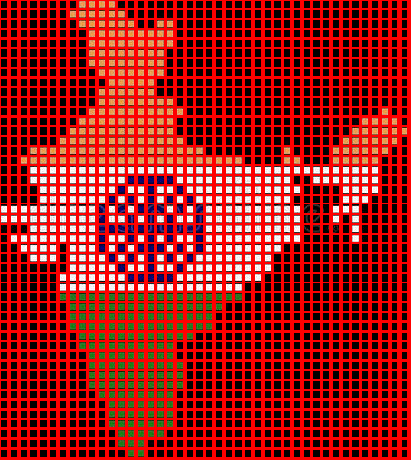

In [124]:
im.save("filtered.png")
im

In [125]:
# Now we will fill the center color of each grid to the whole grid

In [137]:
im = Image.open("filtered.png")
px = im.load()


In [138]:
n, m = im.size
n, m

(411, 460)

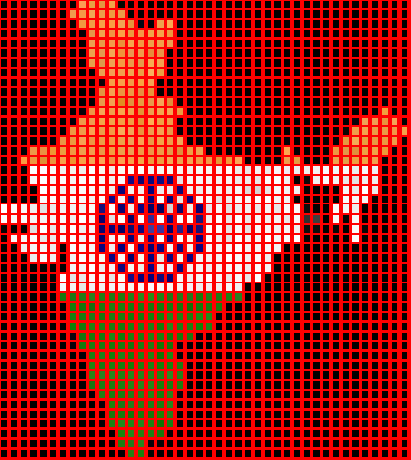

In [139]:
red = (255, 0, 0)
for i in range(n-1):
    for j in range(m-1):
        if px[i,j] == red and px[i+1,j] == red and px[i,j+1] == red and px[i+1,j+1] != red:
            # we got top left corner of a grid
            # now we will fill the whole grid with the center color
            i1, j1 = i+1, j+1
            while i1 < n and px[i1, j+1] != red:
                i1 += 1
            while j1 < m and px[i+1, j1] != red:
                j1 += 1
            center_color = px[(i1+i)//2, (j1+j)//2]
            for i2 in range(i+1, i1):
                for j2 in range(j+1, j1):
                    px[i2, j2] = center_color
im

In [140]:
im.save('color-normalized.png')